<a href="https://colab.research.google.com/github/LarryDCJ/AC_Classifier/blob/master/Classifier_Conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastbook
import re
from fastai.data.all import *
from fastai.vision.all import *
from fastai.metrics import error_rate
import pathlib
from IPython.display import Image
from google.colab import drive
drive.mount('/content/drive')

     |████████████████████████████████| 727kB 7.2MB/s 
     |████████████████████████████████| 1.2MB 14.6MB/s 
     |████████████████████████████████| 194kB 35.5MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
     |████████████████████████████████| 12.8MB 235kB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.8.0+cu101
    Uninstalling torch-1.8.0+cu101:
      Successfully uninstalled torch-1.8.0+cu101
  Found existing installation: torchvision 0.9.0+cu101
    Uninstalling torchvision-0.9.0+cu101:
      Successfully uninstalled torchvision-0.9.0+cu101
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
Drive already mounted at /content/drive; to att

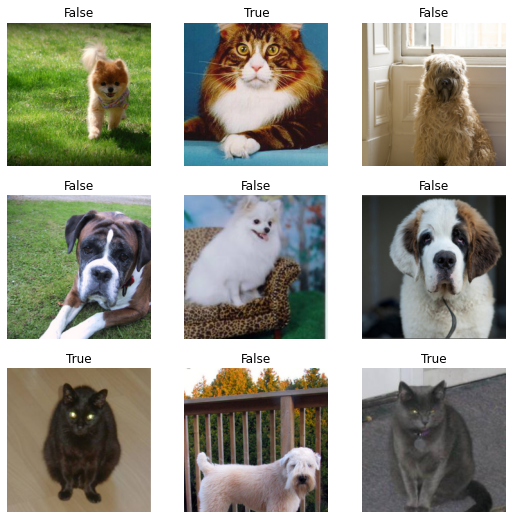

In [ ]:
path = untar_data(URLs.PETS)
path.ls()
files = get_image_files(path/"images")
def label_func(f): return f[0].isupper()
len(files)
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.143910,0.185127,0.065629,00:47


epoch,train_loss,valid_loss,error_rate,time
0,0.064116,0.191519,0.071719,00:49


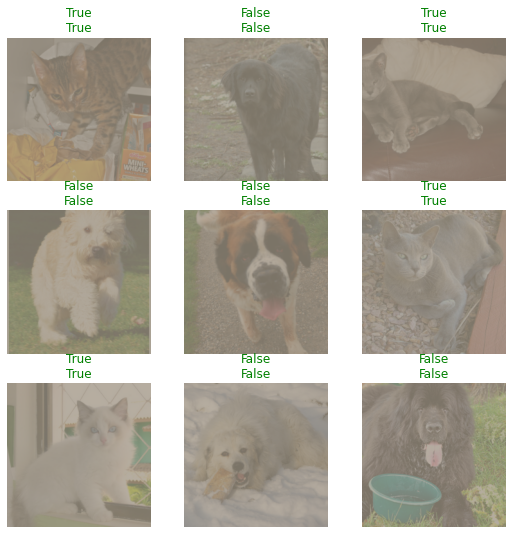

In [ ]:
learn.show_results()

In [ ]:
files[0].name
#def label_func(f): return re.sub("_[^_]+$", "",f)
pat = r'^(.*)_\d+.jpg'

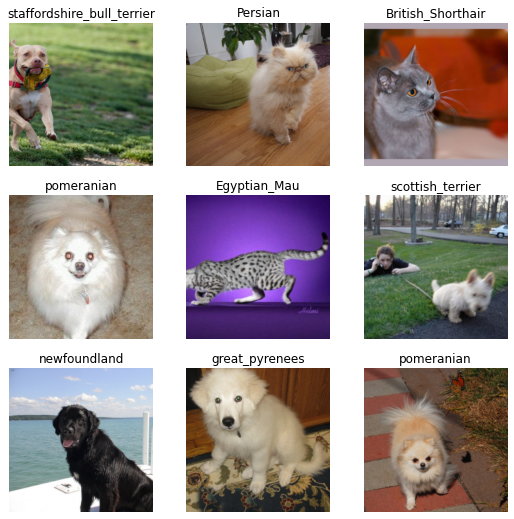

In [ ]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))
dls.show_batch()

In [ ]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460), batch_tfms=aug_transforms(size=224))

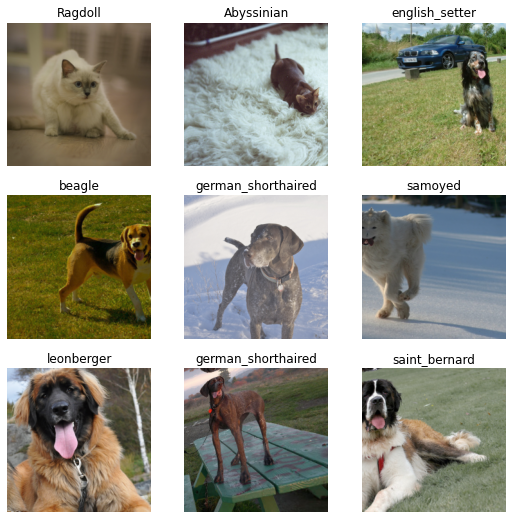

In [ ]:
dls.show_batch()

SuggestedLRs(lr_min=0.00831763744354248, lr_steep=0.0030199517495930195)

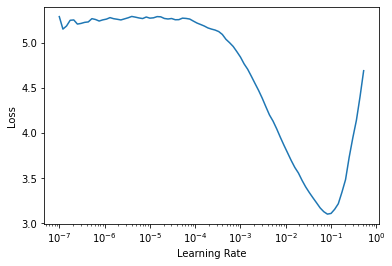

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.lr_find()

In [ ]:
learn.fine_tune(2, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.294198,1.009054,0.301759,01:04


epoch,train_loss,valid_loss,error_rate,time
0,0.509148,1.119417,0.313261,01:07
1,0.325311,0.868610,0.263870,01:06
